In [5]:
import google.generativeai as genai
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:

from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import HumanMessage
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
from langchain_core.tools import tool
tailvy_api_key = os.getenv("TAVILY_API_KEY")
os.environ["TAVILY_API_KEY"] = tailvy_api_key
memory = MemorySaver()
search = TavilySearchResults(max_results=3)
@tool
def dummy_web_search(query: str):
    """TO query online"""
    return f"Web search results for '{query}': [Fake Result 1], [Fake Result 2]"
@tool
def dummy_query(query: str):
    """TO Query Vector database to know about user details"""
    return f"Query result for '{query}': [Fake Data from Database]"
tools = [search,dummy_web_search,dummy_query]
agent_executor = create_react_agent(model, tools, checkpointer=memory)



NameError: name 'TavilySearchResults' is not defined

In [ ]:
config = {"configurable": {"thread_id": "abc123"}}
for step in agent_executor.stream(
    {"messages": [HumanMessage(content="do you know who am i")]},
    config,
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

do you know who am i
================================== Ai Message ==================================

I do not have access to personal information about you. I can only access information you provide in our conversations. Can you tell me who you are?


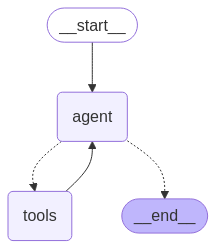

In [ ]:

display(Image(agent_executor.get_graph().draw_mermaid_png()))


In [ ]:
for step in agent_executor.stream(
    {"messages": [HumanMessage(content="whats the weather where I live?")]},
    config,
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

whats the weather where I live?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (9f995112-74eb-4484-91e3-0deb858c0211)
 Call ID: 9f995112-74eb-4484-91e3-0deb858c0211
  Args:
    query: weather in San Francisco
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Weather in San Francisco", "url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1744434703, 'localtime': '2025-04-11 22:11'}, 'current': {'last_updated_epoch': 1744434000, 'last_updated': '2025-04-11 22:00', 'temp_c': 11.7, 'temp_f': 53.1, 'is_day': 0, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/we

In [ ]:
for step in agent_executor.stream(
    {"messages": [HumanMessage(content="Tax for tesla cars in india 2025")]},
    config,
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Tax for tesla cars in india 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (04fe88ba-fdde-4471-a312-6d587b958b5d)
 Call ID: 04fe88ba-fdde-4471-a312-6d587b958b5d
  Args:
    query: tax for Tesla cars in India 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "U.S. eyes zero tariff on cars in India trade deal as Tesla entry nears ...", "url": "https://www.thehindu.com/business/us-eyes-zero-tariff-on-cars-in-india-trade-deal-as-tesla-entry-nears-sources-say/article69297193.ece", "content": "Mr. Musk has now found support from U.S. President Donald Trump, who has repeatedly railed against India's high taxes and in an address to Congress on Tuesday (March 4, 2025) slammed the country's auto tariffs of more than 100%, threatening reciprocal action.\n\n\

In [ ]:
for step in agent_executor.stream(
    {"messages": [HumanMessage(content="In which units will tesla get a low tariffs")]},
    config,
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

In which units will tesla get a low tariffs
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (f0a47d77-8fd0-440b-848c-106740733ee8)
 Call ID: f0a47d77-8fd0-440b-848c-106740733ee8
  Args:
    query: Tesla India import duty units
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "India woos Tesla by slashing import duty on EVs to 15% from 70-100%", "url": "https://www.thehindu.com/news/national/india-woos-tesla-by-slashing-import-duty-on-evs-to-15-from-70-100/article67955547.ece", "content": "In a bid to woo companies like Tesla to set up a manufacturing plant in India, the government on Friday announced reduced import duty of 15% for electric vehicles (EVs) imported as a completely built unit (CBU), from the present 70% to 100% applicable for vehicles imported

In [ ]:
from langgraph.graph import StateGraph, END 

def llm():
    pass


def web_search():
    pass

def retriever():
    pass

def llm_response():
    pass
workflow = StateGraph(GraphState)

workflow.add_node("llm_response",llm)
workflow.add_node("Web_search",web_search)
workflow.add_node("vector database",retriever)
workflow.add_node("process output",llm_response)
workflow.set_entry_point("llm_response")




workflow.add_edge("web_search","process_output")
workflow.add_edge("vector database","process output")
workflow.add_edge("process output","llm response")

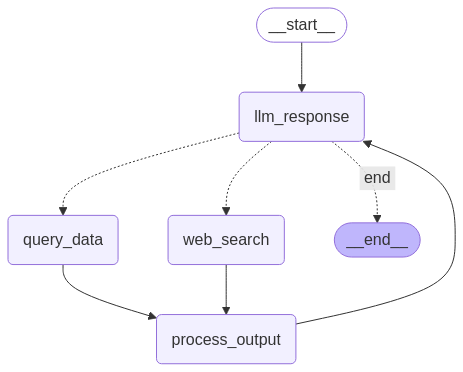

In [ ]:
from langgraph.graph import StateGraph, END
from typing import List, TypedDict
from langchain.schema import BaseMessage, HumanMessage
from IPython.display import display, Image

# --- Your dummy functions ---
def dummy_llm(messages: List[BaseMessage]):
    text = messages[-1].content.lower()
    if "weather" in text:
        return "The weather in Salem today is pleasant."
    elif "attractions" in text:
        return "Popular attractions in Salem include Yercaud and Kottai Mariamman Temple."
    elif "search" in text:
        return "Search results: [Result 1], [Result 2]"
    else:
        return "I don't have information on that."



# --- State definition ---
class GraphState(TypedDict):
    messages: List[BaseMessage]
    tool_output: str | None

# --- Node logic ---
def respond(state: GraphState):
    return {"messages": [*state["messages"], HumanMessage(content=dummy_llm(state["messages"]))]}

def search_tool(state: GraphState):
    query = state["messages"][-1].content
    output = dummy_web_search(query)
    return {"tool_output": output}

def query_tool(state: GraphState):
    query = state["messages"][-1].content
    output = dummy_query(query)
    return {"tool_output": output}

def process_tool_output(state: GraphState):
    return {"messages": [*state["messages"], HumanMessage(content=f"Tool Output: {state['tool_output']}")]}

def should_use_tool(state: GraphState):
    last_message = state["messages"][-1].content.lower()
    if "weather" in last_message or "attractions" in last_message:
        return "llm_response"
    elif "search" in last_message:
        return "web_search"
    elif "query" in last_message:
        return "query_data"
    else:
        return "end"




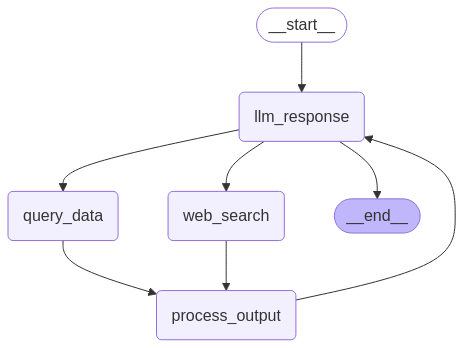

In [ ]:
from typing import Optional , List
def llm_response(user_query, context:Optional[str] = None,n_queries:Optional[int]= None ):
    llm = ChatGoogleGenerativeAI(model = "gemini-2.0-flash")
    max_queries = 5
    system_prompt = ''' You are an ai assistant designed to assist indians to explain the complex indian tax system 
        and provide tips and trics to leverage indian tax system'''
    if context and n_queries<max_queries:
        refernce_data = '''use the refernce articles from internet and user past history data to provide accurate response.{context}'''
        system_prompt = system_prompt+refernce_data
        return llm.invoke([
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_query}
        ])
    
    return llm.invoke([
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_query}
        ])



    


In [ ]:
from langchain_core.tools import tool
import pinecone
@tool
def web_search(user_query):
    """Perform Online search to provide response to the llm"""
    search = TavilySearchResults(max_results=3)
    return search(user_query)

@tool
def query_db(user_query):
    """Perform Retrieval in Vector Database to retrieve user chat history and user past interaction"""
    index_name = "Index"
    index = pinecone.Index(index_name)
    query_vector = model.encode([user_query]).tolist()

    # Search Pinecone
    result = index.query(
        vector=query_vector[0],
        top_k=2,
        include_metadata=True
    )
    res = []
    for match in result["matches"]:
        res.append(f"Score: {match['score']} , Text: {match['metadata']['text']}")
    
    return res

In [ ]:
def process_response(user_query,context):
    system_prompt = f'''Use the following context and summarize the content and provide a brief and detailed response by referring the user qery and the retrieved context.
      User Query :{user_query}
      Context : {context}'''
    return llm.invoke(system_prompt)

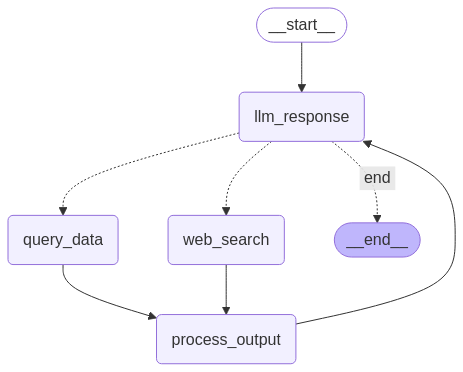

In [ ]:
workflow = StateGraph(GraphState)
workflow.add_node("llm_response", llm_response)
workflow.add_node("web_search", web_search)
workflow.add_node("query_data", query_db)
workflow.add_node("process_output", process_response)
workflow.set_entry_point("llm_response")

workflow.add_conditional_edges(
    "llm_response",
    should_use_tool,
    {
        "web_search": "web_search",
        "query_data": "query_data",
        "end": END,
    },
)

workflow.add_edge("web_search", "process_output")
workflow.add_edge("query_data", "process_output")
workflow.add_edge("process_output", "llm_response")
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
graph = workflow.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
for step in graph.stream(
    {
        "content": [{"role": "user", "content": "hi im bob! and i live in sf"}]
    },
    config,
    stream_mode="values",
):
    print(step["messages"][-1])


ValidationError: 2 validation errors for HumanMessage
content.str
  Input should be a valid string [type=string_type, input_value={'messages': [{'role': 'u...ob! and i live in sf'}]}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
content.list[union[str,dict[any,any]]]
  Input should be a valid list [type=list_type, input_value={'messages': [{'role': 'u...ob! and i live in sf'}]}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/list_type

ImportError: cannot import name 'print_schema' from 'langchain_core.utils.pydantic' (d:\Users\Lib\site-packages\langchain_core\utils\pydantic.py)

In [ ]:

from sentence_transformers import SentenceTransformer  # Assuming you are using SentenceTransformer for encoding
from langchain_google_genai import GoogleGenerativeAIEmbeddings
# Placeholder for TavilySearchResults (Replace this with actual search tool)
class TavilySearchResults:
    def __init__(self, max_results: int):
        self.max_results = max_results
    
    def __call__(self, query: str):
        # This would be where your search logic goes
        return [f"Search result {i} for query: {query}" for i in range(1, self.max_results + 1)]

# Initialize the SentenceTransformer model for encoding
model = GoogleGenerativeAIEmbeddings(model = "models/embedding-001")

# Define the LLM response function
def llm_response(user_query: str, context: Optional[str] = None, n_queries: Optional[int] = None):
    llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
    max_queries = 5
    system_prompt = '''You are an AI assistant designed to assist Indians in explaining the complex Indian tax system 
        and provide tips and tricks to leverage the Indian tax system.'''

    # Add context and previous queries if available
    if context and n_queries is not None and n_queries < max_queries:
        reference_data = f"Use the reference articles from the internet and user past history data to provide accurate responses. Context: {context}"
        system_prompt = system_prompt + " " + reference_data

    # Return the response from the LLM
    return llm.invoke([
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_query}
    ])

# Define the Web Search tool
@tool
def web_search(user_query: str):
    """Perform online search to provide a response to the LLM"""
    search = TavilySearchResults(max_results=3)  # Assuming TavilySearchResults is defined
    search_results = search(user_query)  # Retrieve search results
    return search_results

# Define the Query DB tool for Pinecone
@tool
def query_db(user_query: str):
    """Perform Retrieval in Vector Database to retrieve user chat history and user past interactions"""
    
    # Initialize Pinecone (replace with your actual Pinecone index name and configuration)
    index_name = "Index"
    index = pinecone.Index(index_name)

    # Encode the user query to a vector using the pre-trained model
    query_vector = model.encode([user_query]).tolist()  # Ensure `model` is defined earlier
    
    # Search Pinecone for relevant past interactions
    result = index.query(
        vector=query_vector[0],
        top_k=2,
        include_metadata=True
    )

    # Process and format the search results
    res = []
    for match in result["matches"]:
        res.append(f"Score: {match['score']}, Text: {match['metadata']['text']}")
    
    return res

# Define the Process Response function
def process_response(user_query: str, context: str):
    system_prompt = f'''
    Use the following context to summarize the content and provide a detailed response. Refer to the user query and the retrieved context.

    User Query: {user_query}
    Context: {context}
    '''
    
    # Call the LLM to generate the response based on the system prompt
    llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
    return llm.invoke([{"role": "system", "content": system_prompt}])

# Example workflow function that combines the tools
def handle_query(user_query: str, context: Optional[str] = None, n_queries: Optional[int] = 0):
    # Get LLM response (incorporating context if available)
    response = llm_response(user_query, context, n_queries)
    
    # If response requires further action, like searching or querying, proceed
    if "search" in response.lower():
        search_results = web_search(user_query)
        # Process the search results and create a new context for response
        context = " ".join(search_results)
        response = process_response(user_query, context)
    
    elif "query" in response.lower():
        db_results = query_db(user_query)
        # Process the database results and create a new context for response
        context = " ".join(db_results)
        response = process_response(user_query, context)
    
    return response

# Example call to handle the query
user_query = "Tell me about the tax benefits of a home loan in India."
response = handle_query(user_query, context=None, n_queries=0)
print(response)


AttributeError: 'AIMessage' object has no attribute 'lower'

In [7]:
import os
from dotenv import load_dotenv
load_dotenv()
gemini_api_key = os.getenv("GEMINI_API_KEY")
os.environ["GOOGLE_API_KEY"] = gemini_api_key

In [8]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Initialize the Google Generative AI embedding model
embeddings_model = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

# Example text to generate embeddings for
texts = ["This is a sample sentence.", "Let's generate embeddings with Google Generative AI."]

embeddings = embeddings_model.embed_documents(texts)

print(embeddings)
print(len(embeddings[0]))  

[[0.047744154930114746, -0.008138946257531643, -0.0611766055226326, -0.009358911775052547, 0.06580177694559097, 0.029042575508356094, 0.01681198738515377, -0.031153816729784012, 0.0033935322426259518, 0.031445205211639404, -0.021635867655277252, 0.021847045049071312, -0.008016727864742279, 0.020922191441059113, -0.025096159428358078, -0.02190009318292141, 0.022016925737261772, 0.021770164370536804, 0.03149697557091713, 0.002086266642436385, 0.0024913290981203318, 0.00948693323880434, -0.020706364884972572, 0.004865861963480711, 0.03640289604663849, -0.02171344868838787, 0.023231158033013344, -0.03780597448348999, -0.01901913620531559, 0.00991598330438137, -0.04055732488632202, 0.03905544430017471, -0.05510643124580383, 0.01688580960035324, 0.0028701890259981155, -0.04240761324763298, -0.011024349369108677, 0.020214734598994255, 0.0003034193941857666, -0.0024278948549181223, 0.009073002263903618, -0.01731279492378235, -0.03190214931964874, 0.000875804282259196, 0.013536334037780762, -0.